In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat
import h5py

In [2]:
# view the ns equation and print some useful information
file_path = 'E:\dfno\PIOperator\data\darcy\Darcy_241\piececonst_r241_N1024_smooth1.mat'
file = loadmat(file_path)
print(list(file.keys()))

['__header__', '__version__', '__globals__', 'Kcoeff', 'Kcoeff_x', 'Kcoeff_y', 'coeff', 'sol']


In [3]:
key_turple = ('Kcoeff', 'Kcoeff_x', 'Kcoeff_y', 'coeff', 'sol')
for key in key_turple:
    print(f'{key} shape:{np.array(file[key]).shape}')

Kcoeff shape:(1024, 241, 241)
Kcoeff_x shape:(1024, 241, 241)
Kcoeff_y shape:(1024, 241, 241)
coeff shape:(1024, 241, 241)
sol shape:(1024, 241, 241)


code for viewing

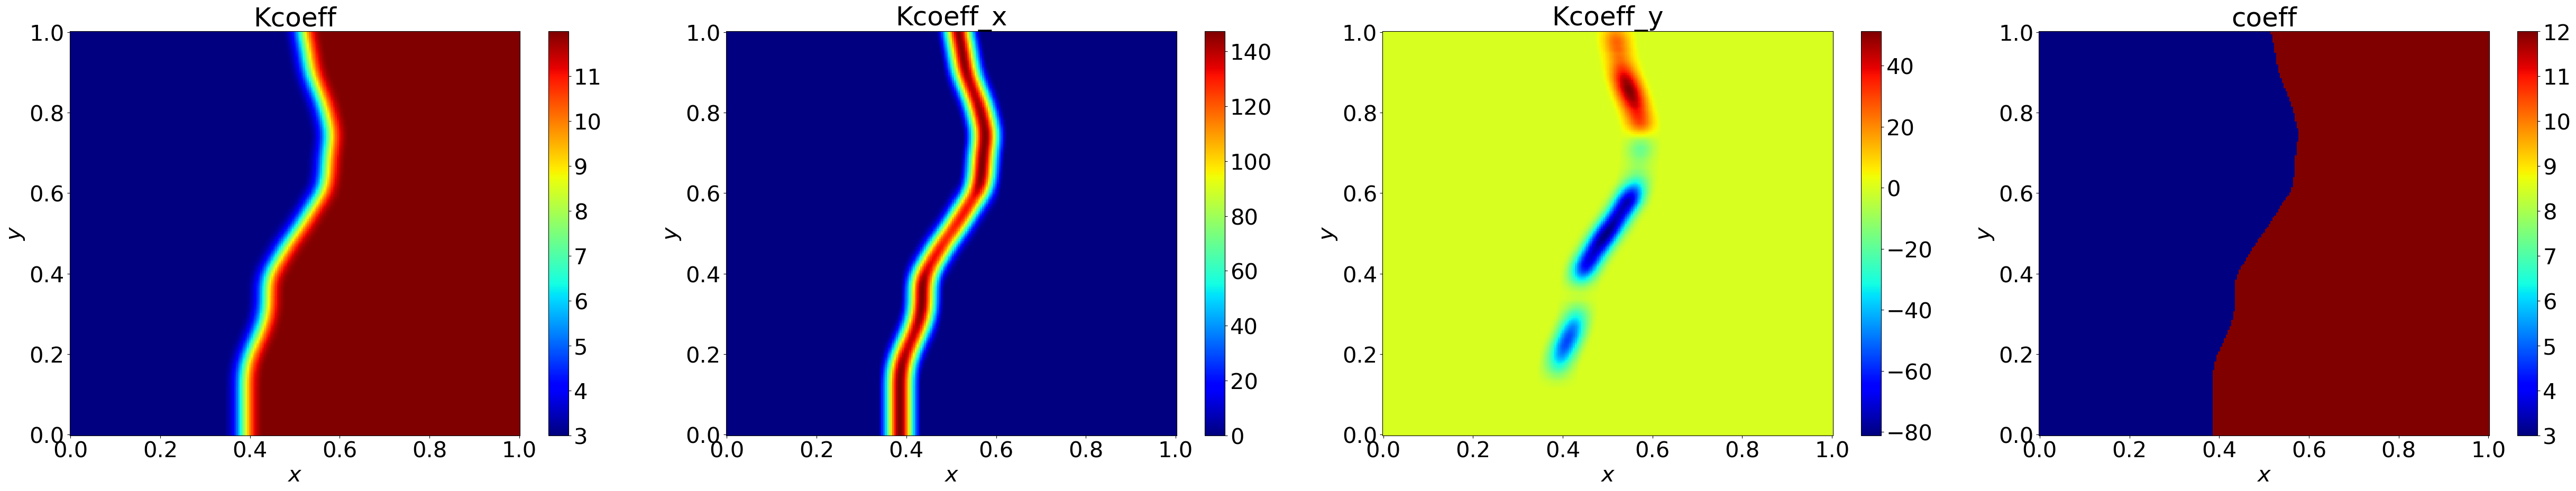

In [14]:
# begin record the value from the file
plt.rcParams['font.size'] = 30
sol = np.array(file['sol'])  # shape:(1024, 241, 241) the vorticity at time:1 to time:50
Kcoeff = np.array(file['Kcoeff'])  # shape:(1024, 241, 241) the vorticity at time:0
P_test = sol.shape[1]
t = np.linspace(0, 1, P_test)
x = np.linspace(0, 1, P_test)
T, X = np.meshgrid(t, x)
fig, ax = plt.subplots(1, 4, figsize=(50, 10))
for i in range(4):
    ax[i].set_xlabel('$x$')
    ax[i].set_ylabel('$y$')
    ax[i].set_title(key_turple[i])
    pc = ax[i].pcolormesh(T, x, np.array(file[key_turple[i]])[0, :, :,], cmap='jet')
    fig.colorbar(pc, ax=ax[i])
    
plt.tight_layout()
plt.savefig('darcy_2d', dpi=600)

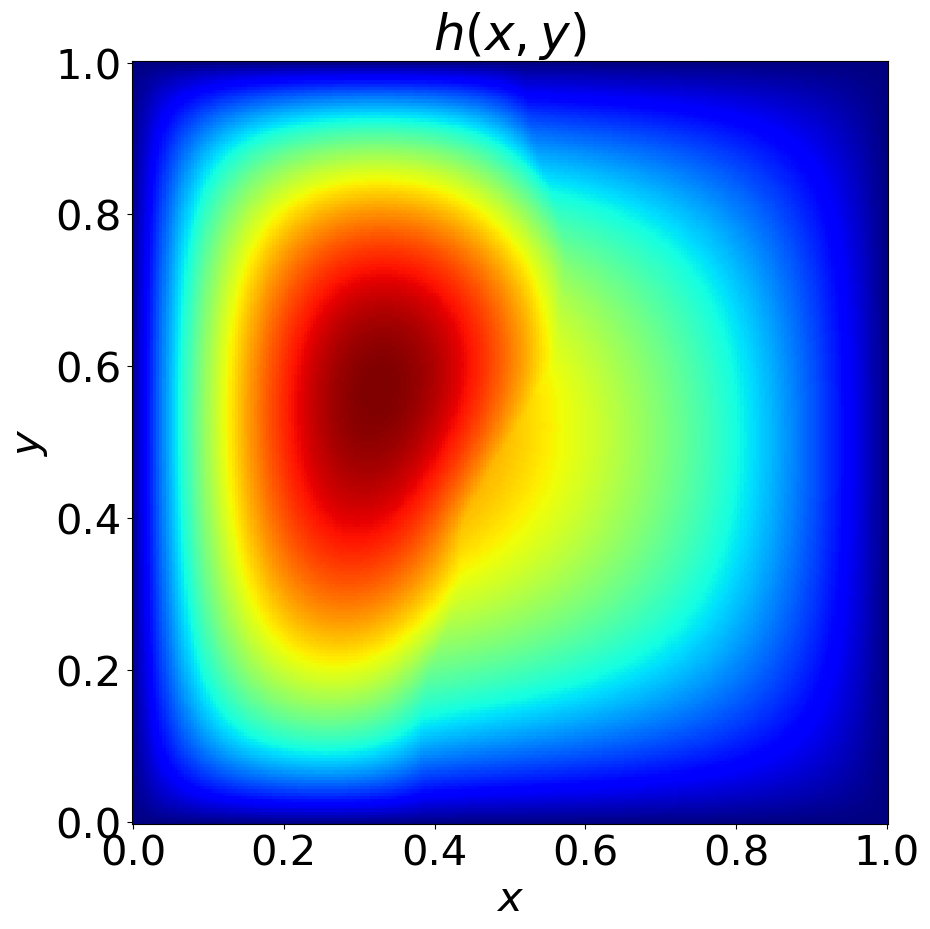

In [18]:
# begin record the value from the file
fig = plt.figure(figsize=(10, 10))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$h(x,y)$')
pc = plt.pcolor(T, x, np.array(file[key_turple[4]])[0, :, :,], cmap='jet')
plt.colorbar(pc, ax=ax[i])
    
plt.tight_layout()
plt.savefig('darcy_2d_sol', dpi=600)